### Comparing 2007 and 2013 West Coast Ocean Acidification cruises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gsw
import cbsyst as cb

Load 2013 data

In [15]:
filename13 = 'data/week01_wcoa_cruise/WCOA2013_hy1.csv'
df13 =  pd.read_csv(filename13,header=31,na_values=-999,parse_dates=[[8,9]])

Load 2007 data

In [17]:
filename07 = 'data/week03_wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

Use the cbsyst package to calculate seawater carbon chemistry parameters.

https://github.com/oscarbranson/cbsyst

In [18]:
Csw13 = cb.Csys(DIC=df13['TCARBN'],
                TA=df13['ALKALI'],
               T_in=df13['CTDTMP'],
               S_in=df13['CTDSAL'],
               P_in=df13['CTDPRS'])

In [29]:
Ca = 0.0102821 # Calcium ion concentration
df13['OmegaA'] = (Ca*Csw13['CO3'])/(Csw13.Ks['KspA']*1e6)

Text(0.5, 1.0, 'Aragonite saturation state')

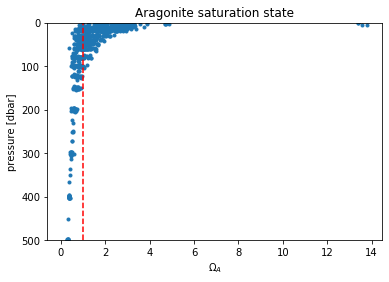

In [30]:
plt.figure()
plt.plot(df13['OmegaA'],df13['CTDPRS'],'.')
plt.gca().invert_yaxis()
yl = plt.ylim([500,0])
plt.plot([1,1],yl,'r--')
plt.ylabel('pressure [dbar]')
plt.xlabel('$\Omega_A$')
plt.title('Aragonite saturation state')